In [33]:
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np

In [34]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.cifar10.load_data()

In [35]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

In [36]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

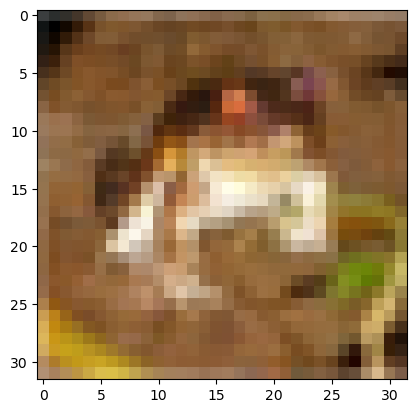

In [37]:
plt.imshow(train_data[0])
plt.show()

In [38]:
random_index = np.random.randint(low=0, high=len(train_data), size=10)
random_index

array([11421, 33275, 26568, 12411, 43710, 39926, 32928, 40170,  6015,
        7662])

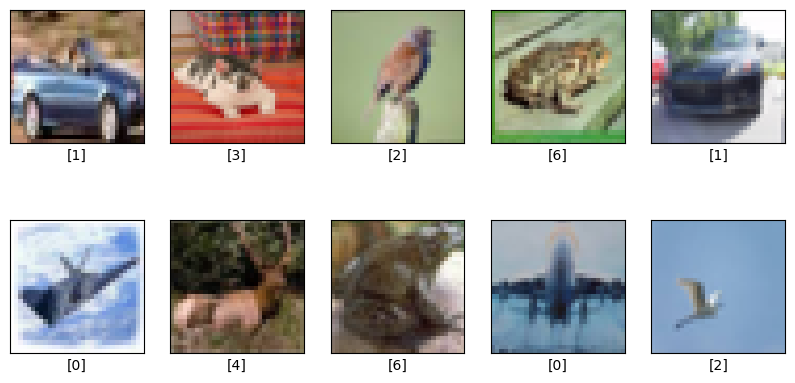

In [39]:
plt.figure(figsize=(10,5))
for i in range(len(random_index)):
    plt.subplot(2, 5, i+1)
    # plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    plt.imshow(train_data[random_index[i]])
    plt.xlabel(train_labels[random_index[i]])
plt.show()

# Modelling the CNN

In [40]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=(32,32,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

In [41]:
model.compile(
    optimizer="adadelta",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [44]:
history = model.fit(
    train_data, train_labels_cat,
    batch_size=32, epochs=50
)

Epoch 1/50
1563/1563 [==============================] - 65s 41ms/step - loss: 2.2908 - accuracy: 0.1538
Epoch 2/50
1563/1563 [==============================] - 69s 44ms/step - loss: 2.2821 - accuracy: 0.1645
Epoch 3/50
1563/1563 [==============================] - 64s 41ms/step - loss: 2.2704 - accuracy: 0.1766
Epoch 4/50
1563/1563 [==============================] - 63s 41ms/step - loss: 2.2540 - accuracy: 0.1995
Epoch 5/50
1563/1563 [==============================] - 174s 112ms/step - loss: 2.2305 - accuracy: 0.2103
Epoch 6/50
1563/1563 [==============================] - 62s 40ms/step - loss: 2.1990 - accuracy: 0.2326
Epoch 7/50
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1614 - accuracy: 0.2441
Epoch 8/50
1563/1563 [==============================] - 63s 40ms/step - loss: 2.1223 - accuracy: 0.2517
Epoch 9/50
1563/1563 [==============================] - 62s 40ms/step - loss: 2.0872 - accuracy: 0.2599
Epoch 10/50
1563/1563 [==============================] - 360s 

In [43]:
image = train_data[0]

activation_model1 = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
activation_model2 = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
activation_model3 = keras.Model(inputs=model.inputs, outputs=model.layers[4].output)
activation_model4 = keras.Model(inputs=model.inputs, outputs=model.layers[6].output)

activation1 = activation_model1.predict(image)
activation2 = activation_model2.predict(image)
activation3 = activation_model3.predict(image)
activation4 = activation_model4.predict(image)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(activation1)
    plt.axis('off')
plt.suptitle("Activations from layer 1 Conv2D")
plt.show()